In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows의 한글 폰트 설정

# 음수 표시 설정 (깨지는 문제 방지)
plt.rcParams['axes.unicode_minus'] = False

In [5]:
card_data.head()

,"신용or체크(신용20, 체크 17)",카드명,혜택(할인),혜택(캐시백),혜택(편의),혜택(생활),혜택(독서),혜택(테마파크),혜택(특이사항),실적,혜택(공항),연회비,특이사항,링크,x_score,y_score,연회비(정수)
0,iM뱅크 (신용),iM 스카이패스 카드 V2 Silver,NaN,1천원당 대한항공 1 마일리지 적립,NaN,NaN,NaN,NaN,NaN,NaN,[대한항공 마일리지 적립 서비스]\r\n국내외 가맹점 이용금액 1천원당 1마일리지 ...,"국내전용(BC)/국내외겸용(Mastercard): 19,000원\n(기본연회비 0원...",NaN,NaN,-20,0,19000.0
1,iM뱅크 (신용),iM 스카이패스 카드 V2 Gold,NaN,1천원당 대한항공 최대 2마일리지 적립에 공항라운지 무료 혜택까지,NaN,NaN,NaN,NaN,NaN,NaN,"국내전용(BC)/국내외겸용(Mastercard): 35,000원\n(기본연회비 0원...",NaN,NaN,NaN,-20,30,35000.0
2,iM뱅크 (신용),iM i 카드,NaN,온라인쇼핑·배달앱·커피·편의점·이동통신 10% 할인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,국내전용(BC)/국내외겸용(Mastercard):1만원\n(기본연회비 0원+제휴연회...,NaN,NaN,0,0,10000.0
3,iM뱅크 (신용),iM 세븐캐쉬백카드,NaN,3만원 이상 일시불 이용 시 7% 할인,NaN,NaN,NaN,NaN,NaN,전월실적 30만원이상 60만원이상 120만원이...,NaN,"BC(국내전용) : 1만원, Master(해외겸용) : 1만 2천원",NaN,NaN,10,0,10000.0
4,iM뱅크 (신용),부자되세요 홈쇼핑카드,NaN,6대 홈쇼핑 이용액의 6% 할인,NaN,패밀리레스토랑 10% 청구할인\r\n\r\n베이커리 10% 청구할인\r\n\r\n커...,NaN,NaN,NaN,NaN,NaN,CUP : 5천원(기본연회비 2천원 + 제휴연회비 3천원)\r\nVISA : 8천원...,NaN,NaN,0,-30,5000.0


In [4]:
card_data.columns

Index(['신용or체크(신용20, 체크 17)', '카드명', '혜택(할인)', '혜택(캐시백)', '혜택(편의)', '혜택(생활)',
       '혜택(독서)', '혜택(테마파크)', '혜택(특이사항)', '실적', '혜택(공항)', '연회비', '특이사항', '링크',
       'x_score', 'y_score', '연회비(정수)'],
      dtype='object')

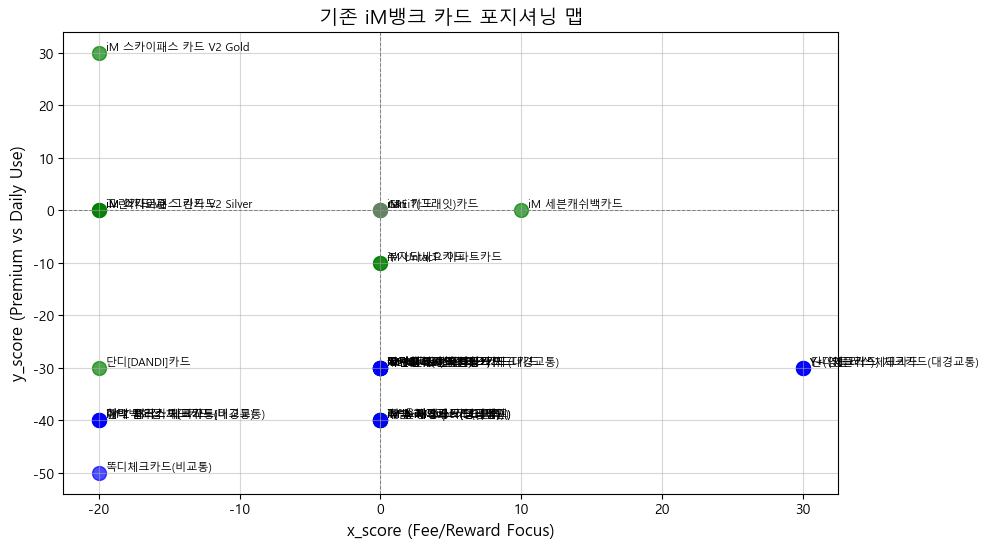

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
card_data = pd.read_csv('카드조사(1115).csv')

# 포지셔닝 맵 그리기
plt.figure(figsize=(10, 6))

# 신용카드와 체크카드를 구분하여 색상을 설정
for index, row in card_data.iterrows():
    card_type = str(row["신용or체크(신용20, 체크 17)"])  # 값을 문자열로 변환
    if "신용" in card_type:
        color = 'green'  # 신용카드는 초록색
    elif "체크" in card_type:
        color = 'blue'   # 체크카드는 파란색
    else:
        color = 'gray'   # 기타 경우

    # 점과 카드명을 표시
    plt.scatter(row['x_score'], row['y_score'], alpha=0.7, s=100, color=color)
    plt.text(row['x_score'] + 0.5, row['y_score'] + 0.5, str(row['카드명']), fontsize=8)

# 축 추가 (x축과 y축 중심 위치에 설정)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)

# 그래프 제목 및 축 레이블 설정
plt.title("기존 iM뱅크 카드 포지셔닝 맵", fontsize=14)
plt.xlabel("x_score (Fee/Reward Focus)", fontsize=12)
plt.ylabel("y_score (Premium vs Daily Use)", fontsize=12)

# 격자 추가
plt.grid(True, alpha=0.5)

# 그래프 출력
plt.show()


4 [-0.23959712 -0.27916332]
12 [ 0.58381014 -0.21416181]
34 [0.39215046 0.32103678]
22 [-0.11463319 -0.02775517]
23 [ 0.03836853 -0.98584396]


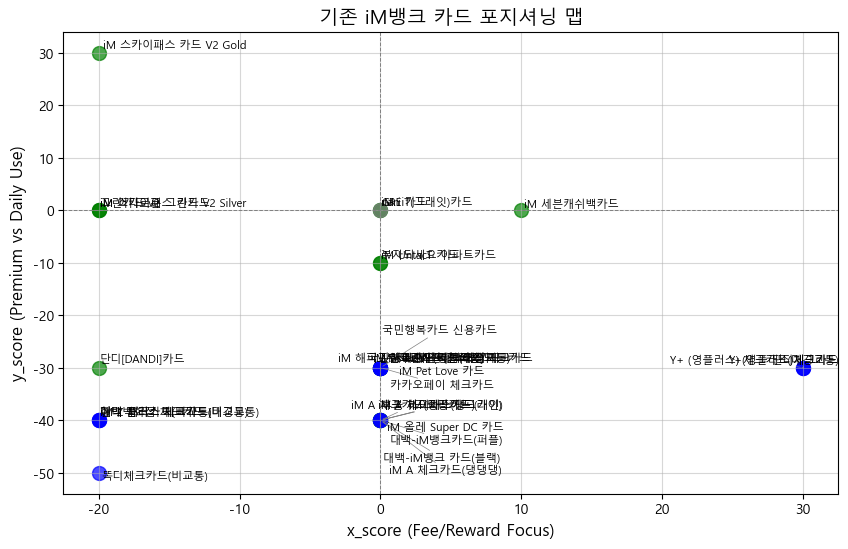

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text  # 텍스트 자동 조정 라이브러리

# 데이터 로드
card_data = pd.read_csv('카드조사(1115).csv')

# 포지셔닝 맵 그리기
plt.figure(figsize=(10, 6))

texts = []  # 텍스트 객체를 저장할 리스트

for index, row in card_data.iterrows():
    card_type = str(row["신용or체크(신용20, 체크 17)"])  # 값을 문자열로 변환
    if "신용" in card_type:
        color = 'green'  # 신용카드는 초록색
    elif "체크" in card_type:
        color = 'blue'   # 체크카드는 파란색
    else:
        color = 'gray'   # 기타 경우

    # 점 그리기
    plt.scatter(row['x_score'], row['y_score'], alpha=0.7, s=100, color=color)

    # 텍스트 추가 (카드명)
    texts.append(plt.text(row['x_score'], row['y_score'], str(row['카드명']), fontsize=8))

# 텍스트 위치 자동 조정
adjust_text(texts, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# 축 추가 (x축과 y축 중심 위치에 설정)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)

# 그래프 제목 및 축 레이블 설정
plt.title("기존 iM뱅크 카드 포지셔닝 맵", fontsize=14)
plt.xlabel("x_score (Fee/Reward Focus)", fontsize=12)
plt.ylabel("y_score (Premium vs Daily Use)", fontsize=12)

# 격자 추가
plt.grid(True, alpha=0.5)

# 그래프 출력
plt.show()


4 [-0.59390331  0.52110767]
12 [-0.38645227 -0.5759058 ]
34 [-0.86847595 -0.74548781]
22 [ 0.0585652 -0.0646224]
23 [0.99086331 0.78789206]


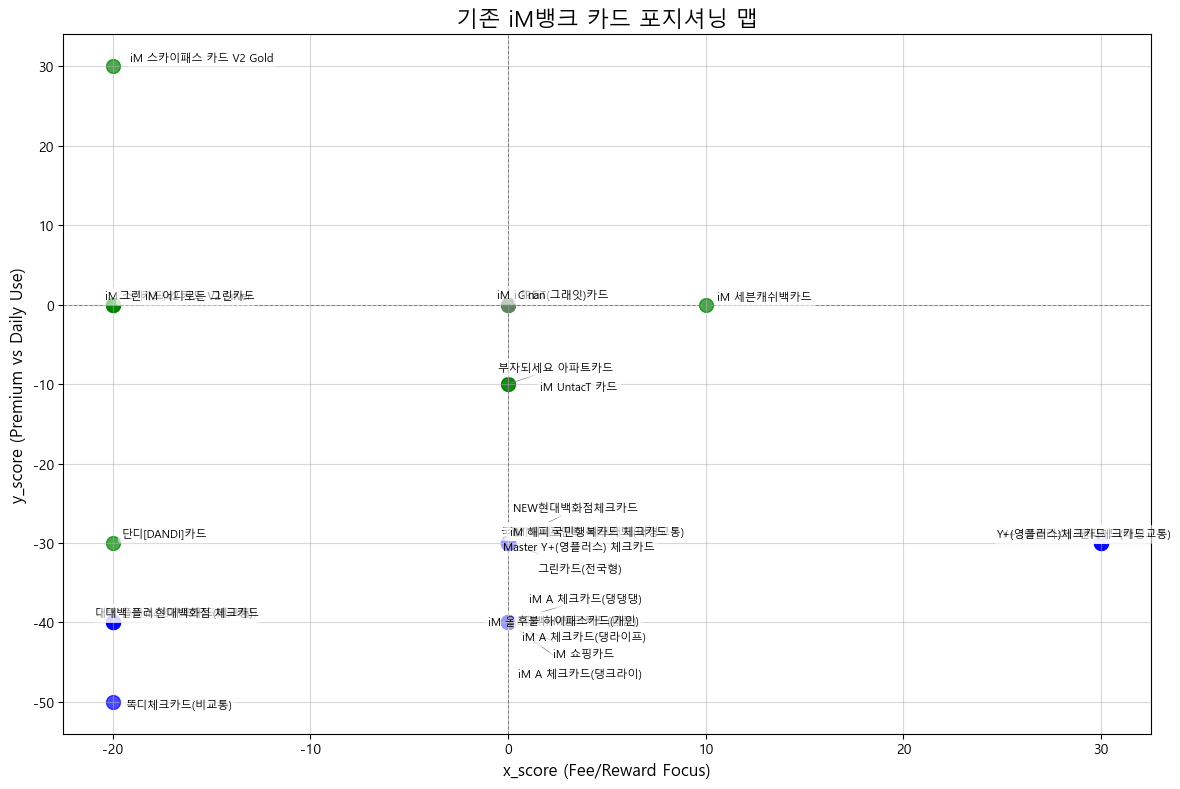

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# 데이터 로드
card_data = pd.read_csv('카드조사(1115).csv')

# 포지셔닝 맵 그리기
plt.figure(figsize=(12, 8))

texts = []  # 텍스트 객체 저장 리스트

for index, row in card_data.iterrows():
    card_type = str(row["신용or체크(신용20, 체크 17)"])  # 값을 문자열로 변환
    if "신용" in card_type:
        color = 'green'  # 신용카드는 초록색
    elif "체크" in card_type:
        color = 'blue'   # 체크카드는 파란색
    else:
        color = 'gray'   # 기타 경우

    # 점 그리기
    plt.scatter(row['x_score'], row['y_score'], alpha=0.7, s=100, color=color)

    # 텍스트 추가 (카드명에 배경색 추가)
    texts.append(
        plt.text(
            row['x_score'], row['y_score'], str(row['카드명']),
            fontsize=8, color='black',
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.3')
        )
    )

# 텍스트 위치 자동 조정
adjust_text(
    texts, 
    only_move={'points': 'y', 'text': 'y'}, 
    arrowprops=dict(arrowstyle='-', color='gray', lw=0.5)
)

# 축 추가 (x축과 y축 중심 위치에 설정)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)

# 그래프 제목 및 축 레이블 설정
plt.title("기존 iM뱅크 카드 포지셔닝 맵", fontsize=16)
plt.xlabel("x_score (Fee/Reward Focus)", fontsize=12)
plt.ylabel("y_score (Premium vs Daily Use)", fontsize=12)

# 격자 추가
plt.grid(True, alpha=0.5)

# 그래프 출력
plt.tight_layout()  # 여백 조정
plt.savefig('기존 iM뱅크 카드 포지셔닝 맵.png', dpi=300, bbox_inches='tight')  # 이미지 저장
plt.show()
